<a href="https://colab.research.google.com/github/Sachinrn28/ML-assignments/blob/main/Assignment_2_Problems_using_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import requests
import pandas as pd
from io import StringIO

url = "https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

In [3]:
df.sample(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1284,0.83,0.83,5,260,5,0,1,0,IT,medium
10987,0.54,0.73,3,157,3,0,0,0,RandD,low
7746,0.55,0.49,2,180,5,1,0,0,technical,low
2477,0.81,0.83,3,196,2,0,0,0,technical,low
6110,0.86,0.56,5,237,3,0,0,0,technical,low
7452,0.74,0.56,3,125,6,0,0,0,support,medium


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df['sales'].values # There are two categorical variable in this

array(['sales', 'sales', 'sales', ..., 'support', 'support', 'support'],
      dtype=object)

In [16]:
df.isnull().sum()# There are no null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [29]:
# Convert the categorical variable to th numerical variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [31]:
encode=['sales','salary']
df[['sales','salary']]=le.fit_transform(encode)

In [32]:
df.sample(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1382,0.10,0.88,6,263,4,0,1,0,1,0
3591,1.00,0.76,5,201,3,0,0,0,1,0
9565,0.94,0.49,4,220,3,0,0,0,1,0
11301,0.76,0.99,3,133,4,0,0,0,1,0
9031,0.55,0.73,4,201,3,0,0,0,1,0
8351,0.60,0.76,5,168,2,1,0,0,1,0


In [34]:
x=df.drop('left',axis=1)
y=df['left']

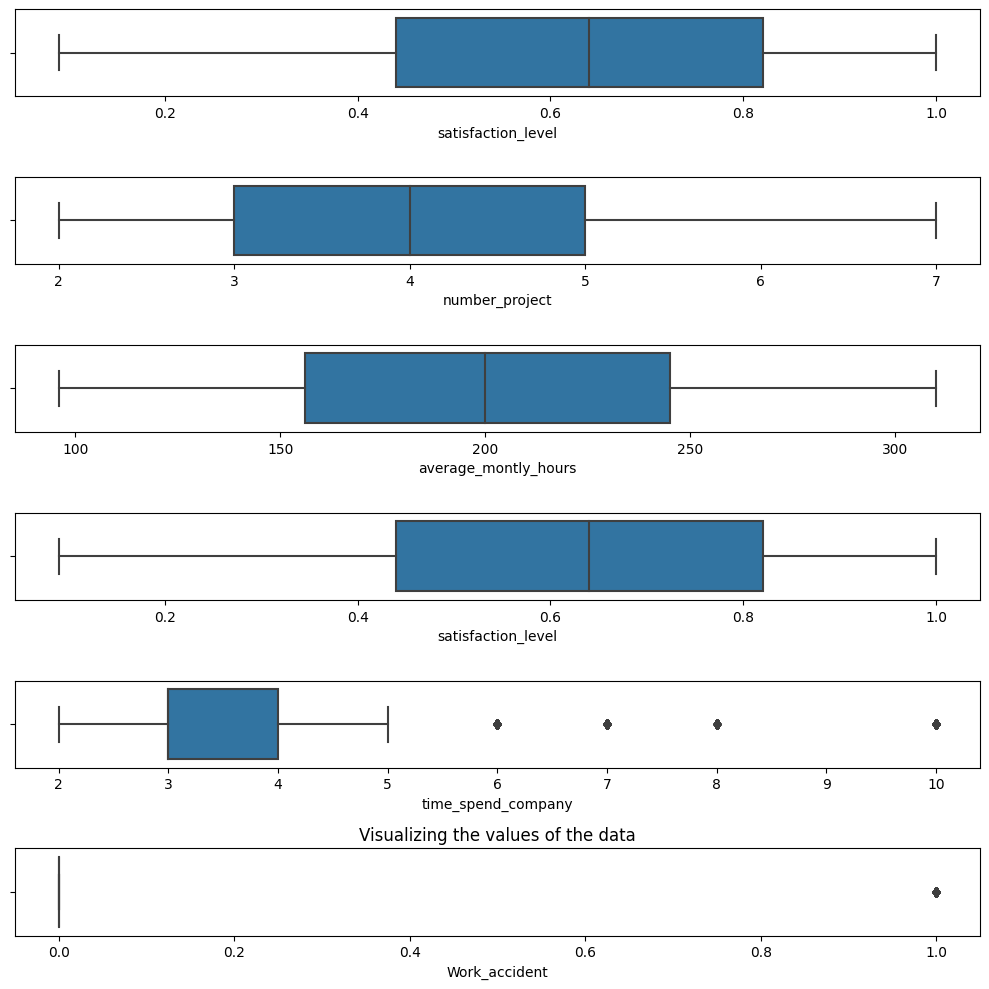

In [46]:
# we have outliers in the column time spend company
import seaborn as sns
import matplotlib.pyplot as plt
fig,axs=plt.subplots(6,figsize=(10,10))
plt.title('Visualizing the values of the data')
sns.boxplot(x=df['satisfaction_level'],ax=axs[0])
sns.boxplot(x=df['number_project'],ax=axs[1])
sns.boxplot(x=df['average_montly_hours'],ax=axs[2])
sns.boxplot(x=df['satisfaction_level'],ax=axs[3])
sns.boxplot(x=df['time_spend_company'],ax=axs[4])
sns.boxplot(x=df['Work_accident'],ax=axs[5])
plt.tight_layout()
plt.show()

In [66]:
# treating outlier
q1=df['time_spend_company'].quantile(0.25)
q3=df['time_spend_company'].quantile(0.75)
IQR=q3-q1
local=df['time_spend_company']
local[(local<q1-1.5*IQR)|(local>q3+1.5*IQR)].count()

1282

In [67]:
import numpy as np
df['time_spend_company']=np.where(df['time_spend_company']<q1-1.5*IQR,IQR,df['time_spend_company'])
df['time_spend_company']=np.where(df['time_spend_company']>q3+1.5*IQR,IQR,df['time_spend_company'])

<Axes: xlabel='time_spend_company'>

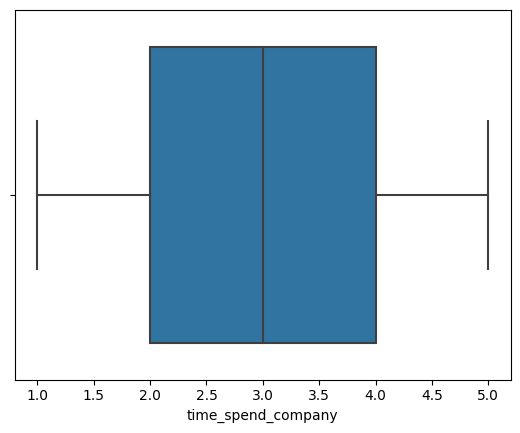

In [70]:
sns.boxplot(x=df['time_spend_company']) # we treated outliers

In [71]:
# Splitting data to dependenet and independent variable
x=df.drop('left',axis=1)
y=df['left']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.2)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=8)
knc

KNeighborsClassifier(n_neighbors=8)

In [79]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [80]:
y_pred=knc.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.948